# Project: Investigate a Dataset: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df_census = pd.read_csv('ncis-and-census-data/U.S. Census Data.csv')
df_gun = pd.read_excel('ncis-and-census-data/gun_data.xlsx', engine='openpyxl')

In [3]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [6]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [7]:
df_census[df_census['Alaska'].isna()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,(c),Economic Census - Puerto Rico data are not com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sum(df_census.duplicated())

3

In [9]:
df_census[df_census.duplicated() == True]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sum(df_gun.duplicated())

0

In [11]:
sum(df_gun.isna().any())

23

In [12]:
df_gun[df_gun.isna().any(axis=1)]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,2016-07,Alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,...,0.0,NaN,NaN,9.0,5.0,0.0,1.0,1.0,0.0,48927
771,2016-07,Alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,...,0.0,NaN,NaN,7.0,17.0,0.0,1.0,0.0,0.0,6793
772,2016-07,Arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,...,0.0,NaN,NaN,13.0,9.0,0.0,0.0,1.0,0.0,34496
773,2016-07,Arkansas,4116.0,677.0,6323.0,5053.0,325.0,367,2.0,6.0,...,0.0,NaN,NaN,7.0,5.0,1.0,0.0,1.0,0.0,19378
774,2016-07,California,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [13]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [14]:
df_gun[df_gun['totals'] == 0]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
406,2017-02,Mariana Islands,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
516,2016-12,Mariana Islands,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
956,2016-04,Mariana Islands,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
1231,2015-11,Mariana Islands,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
1836,2014-12,Mariana Islands,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12424,1998-12,Virgin Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12438,1998-11,District of Columbia,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12441,1998-11,Guam,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12451,1998-11,Mariana Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
df_gun[df_gun['totals'] == 0].describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,246.0,3.0,246.0,246.0,53.0,265.0,247.0,182.0,183.0,46.0,...,4.0,6.0,3.0,10.0,10.0,10.0,9.0,10.0,7.0,265.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_gun.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

### Data Cleaning for FBI Gun Data and U.S. census Data

### Issues to be cleaned
- Drop NaN rows from [65:] in `df_census`
- Drop fact note columns in `df_census`
- Fix month column in `df_gun`
- In `df_gun` remove rows that have `totals == 0`
- Remove percentage sign and fix values

In [17]:
df_census_clean = df_census.copy()
df_gun_clean = df_gun.copy()

#### Define
- Drop NaN rows from [65:] in `df_census_clean`
- Drop Fact Note columns in `df_census_clean`

#### Code

In [18]:
df_census_clean.drop(df_census_clean.index[65:], inplace = True)

In [19]:
df_census_clean.drop(['Fact Note'], axis=1, inplace=True)

#### Test

In [20]:
sum(df_census_clean.duplicated())

0

In [21]:
df_census_clean.head(10)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [22]:
df_census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

#### Define
- Get the transpose of `df_census_clean`

#### Code

In [23]:
df_census_clean.set_index('Fact', inplace=True) 

In [24]:
df_census_clean = df_census_clean.T.reset_index()

In [25]:
df_census_clean.rename(columns={'index': 'state'}, inplace=True)

#### Test

In [26]:
df_census_clean.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [27]:
df_census_clean.columns

Index(['state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 20

#### Define
- Remove percentage sign and fix values

#### Code

In [28]:
columns = df_census_clean.columns[1:len(df_census_clean.columns)-1]
columns

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [29]:
def fix_percentage(entity):
    val = entity
    if val < 1:
        val *= 100
        
    return val

In [30]:
for column in columns:
    df_census_clean[column].replace(regex=True, inplace=True, to_replace = r'[^\d.-]', value = r'')
    df_census_clean[column] = pd.to_numeric(df_census_clean[column], downcast='float')
    df_census_clean[column] = df_census_clean[column].apply(fix_percentage)

#### Test

In [31]:
df_census_clean.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.600000,23.700001,16.100000,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.400002,50645.328125,"""01"""
1,Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.200001,26.400000,10.400000,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.200000,570640.937500,"""02"""
2,Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.500000,25.500000,16.900000,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.299999,113594.078125,"""04"""
3,Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.600000,24.400000,16.299999,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.000000,52035.480469,"""05"""
4,California,39250016.0,37254520.0,5.4,37253956.0,6.3,6.8,23.200001,25.000000,13.600000,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.100006,155779.218750,"""06"""


In [32]:
df_census_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     float64
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 4   Population, Census, April 1, 2010                                                       50 non-null     float64
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

#### Define
- Remove spaces and commas in column names

#### Code

In [33]:
df_census_cols = df_census_clean.columns
new_census_cols = []
for i in range(len(df_census_cols)):
    c = df_census_cols[i].replace(' ', '_')
    c = c.replace(',', '')
    new_census_cols.append(c)

df_census_clean.columns = new_census_cols

#### Test

In [34]:
df_census_clean.head()

,state,Population_estimates_July_1_2016__(V2016),Population_estimates_base_April_1_2010__(V2016),Population_percent_change_-_April_1_2010_(estimates_base)_to_July_1_2016__(V2016),Population_Census_April_1_2010,Persons_under_5_years_percent_July_1_2016__(V2016),Persons_under_5_years_percent_April_1_2010,Persons_under_18_years_percent_July_1_2016__(V2016),Persons_under_18_years_percent_April_1_2010,Persons_65_years_and_over_percent__July_1_2016__(V2016),...,All_firms_2012,Men-owned_firms_2012,Women-owned_firms_2012,Minority-owned_firms_2012,Nonminority-owned_firms_2012,Veteran-owned_firms_2012,Nonveteran-owned_firms_2012,Population_per_square_mile_2010,Land_area_in_square_miles_2010,FIPS_Code
0,Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.600000,23.700001,16.100000,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.400002,50645.328125,"""01"""
1,Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.200001,26.400000,10.400000,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.200000,570640.937500,"""02"""
2,Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.500000,25.500000,16.900000,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.299999,113594.078125,"""04"""
3,Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.600000,24.400000,16.299999,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.000000,52035.480469,"""05"""
4,California,39250016.0,37254520.0,5.4,37253956.0,6.3,6.8,23.200001,25.000000,13.600000,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.100006,155779.218750,"""06"""


#### Define
- In df_gun remove rows that have totals == 0

#### Code

In [35]:
df_gun_clean_null_rows = df_gun_clean[df_gun_clean['totals'] == 0]
df_gun_clean.drop(df_gun_clean_null_rows.index, inplace=True)

#### Test

In [36]:
df = df_gun_clean.query('permit == 0').query('handgun == 0').query('long_gun == 0')
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1451,2015-07,Mariana Islands,0.0,NaN,0.0,0.0,1.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
1781,2015-01,Mariana Islands,0.0,NaN,0.0,0.0,1.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
7391,2006-07,Mariana Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
9701,2003-01,Mariana Islands,0.0,NaN,0.0,0.0,NaN,2,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1451 to 9701
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      4 non-null      object 
 1   state                      4 non-null      object 
 2   permit                     4 non-null      float64
 3   permit_recheck             0 non-null      float64
 4   handgun                    4 non-null      float64
 5   long_gun                   4 non-null      float64
 6   other                      2 non-null      float64
 7   multiple                   4 non-null      int64  
 8   admin                      4 non-null      float64
 9   prepawn_handgun            4 non-null      float64
 10  prepawn_long_gun           4 non-null      float64
 11  prepawn_other              2 non-null      float64
 12  redemption_handgun         4 non-null      float64
 13  redemption_long_gun        4 non-null      float

In [38]:
df_gun.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [39]:
df_gun_clean.isna().sum()

month                            0
state                            0
permit                           5
permit_recheck               11123
handgun                          1
long_gun                         0
other                         6773
multiple                         0
admin                            5
prepawn_handgun               1860
prepawn_long_gun              1863
prepawn_other                 7151
redemption_handgun            1857
redemption_long_gun           1859
redemption_other              7151
returned_handgun             10028
returned_long_gun            10083
returned_other               10409
rentals_handgun              11236
rentals_long_gun             11398
private_sale_handgun          9480
private_sale_long_gun         9480
private_sale_other            9480
return_to_seller_handgun      9754
return_to_seller_long_gun     9480
return_to_seller_other        9972
totals                           0
dtype: int64

#### Define
- Fix month column in df_gun

#### Code

In [40]:
df_gun_clean['year'] = df_gun_clean['month'].apply(lambda m: m.split("-")[0]).astype(int)

df_gun_clean['month'] = df_gun_clean['month'].apply(lambda m: m.split("-")[1]).astype(int)

In [41]:
# Get columns list
df_gun_clean.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'year'],
      dtype='object')

In [42]:
# Rearrange columns
df_gun_clean = df_gun_clean[['year', 'month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals']]

#### Test

In [43]:
df_gun_clean.head()

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [44]:
df_gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12220 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       12220 non-null  int64  
 1   month                      12220 non-null  int64  
 2   state                      12220 non-null  object 
 3   permit                     12215 non-null  float64
 4   permit_recheck             1097 non-null   float64
 5   handgun                    12219 non-null  float64
 6   long_gun                   12220 non-null  float64
 7   other                      5447 non-null   float64
 8   multiple                   12220 non-null  int64  
 9   admin                      12215 non-null  float64
 10  prepawn_handgun            10360 non-null  float64
 11  prepawn_long_gun           10357 non-null  float64
 12  prepawn_other              5069 non-null   float64
 13  redemption_handgun         10363 non-null  flo

#### Define
- Merge `df_gun_clean` and `df_census_clean` at 2010 and 2016

#### Code

In [45]:
df_population_16 = df_census_clean[['state', 'Population_estimates_July_1_2016__(V2016)']]
df_population_16.head()

,state,Population_estimates_July_1_2016__(V2016)
0,Alabama,4863300.0
1,Alaska,741894.0
2,Arizona,6931071.0
3,Arkansas,2988248.0
4,California,39250016.0


In [46]:
df_gun_total_at_16 = df_gun_clean[df_gun_clean['year'] == 2016][['year', 'state', 'totals']]

df_gun_total_at_16 = df_gun_total_at_16.groupby('state')['totals'].sum()
df_gun_total_at_16 = pd.DataFrame(df_gun_total_at_16)
df_gun_total_at_16

,totals
state,
Alabama,616947
Alaska,87647
Arizona,416279
Arkansas,266014
California,2377167
Colorado,540514
Connecticut,317692
Delaware,59430
District of Columbia,875


In [47]:
df_population_10 = df_census_clean[['state', 'Population_estimates_base_April_1_2010__(V2016)']]
df_population_10.head()

,state,Population_estimates_base_April_1_2010__(V2016)
0,Alabama,4780131.0
1,Alaska,710249.0
2,Arizona,6392301.0
3,Arkansas,2916025.0
4,California,37254520.0


In [48]:
df_gun_total_at_10 = df_gun_clean[df_gun_clean['year'] == 2010][['year', 'state', 'totals']]

df_gun_total_at_10 = df_gun_total_at_10.groupby('state')['totals'].sum()
df_gun_total_at_10 = pd.DataFrame(df_gun_total_at_10)
df_gun_total_at_10

,totals
state,
Alabama,308607
Alaska,65909
Arizona,206050
Arkansas,191448
California,816399
Colorado,300820
Connecticut,179595
Delaware,19240
District of Columbia,349


In [49]:
df_gun_census_16 = df_population_16.merge(df_gun_total_at_16, on='state', how='inner')

In [50]:
df_gun_census_10 = df_population_10.merge(df_gun_total_at_16, on='state', how='inner')

#### Test

In [51]:
df_gun_census_16.head()

,state,Population_estimates_July_1_2016__(V2016),totals
0,Alabama,4863300.0,616947
1,Alaska,741894.0,87647
2,Arizona,6931071.0,416279
3,Arkansas,2988248.0,266014
4,California,39250016.0,2377167


In [52]:
df_gun_census_10.head()

,state,Population_estimates_base_April_1_2010__(V2016),totals
0,Alabama,4780131.0,616947
1,Alaska,710249.0,87647
2,Arizona,6392301.0,416279
3,Arkansas,2916025.0,266014
4,California,37254520.0,2377167


<a id='eda'></a>
## Exploratory Data Analysis

### What census data is most associated with high gun per capita in 2016?

In [53]:
len(df_gun_census_10)

50

Text(0.5, 1.0, 'Comparison between population estimates and gun sales in 2010')

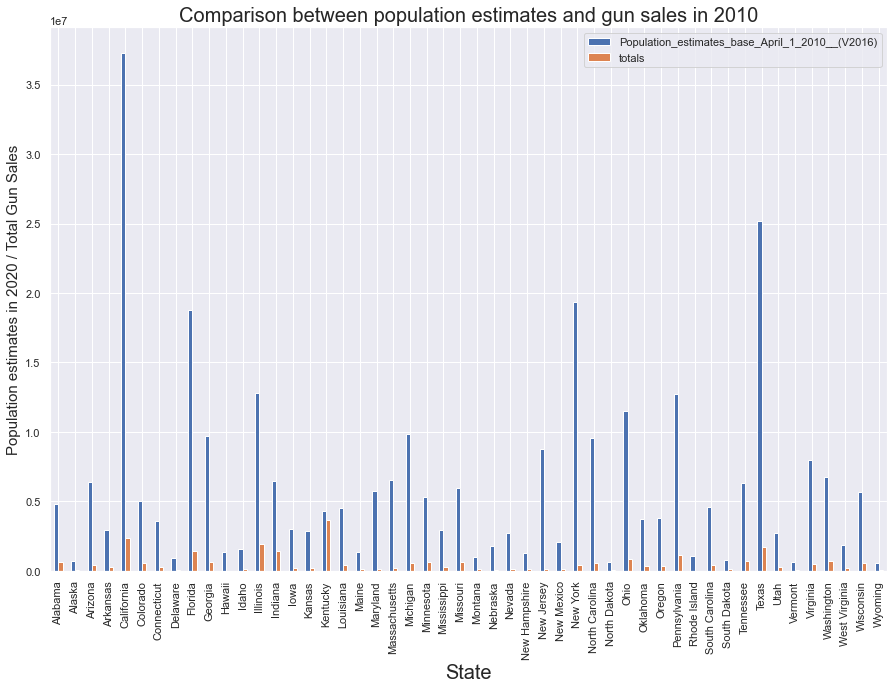

In [71]:
sns.set()
df_gun_census_10.plot(x='state', y=['Population_estimates_base_April_1_2010__(V2016)', 'totals'], kind='bar', figsize=(15, 10))
plt.xlabel("State", fontsize=20)
plt.ylabel("Population estimates in 2020 / Total Gun Sales", fontsize=15)
plt.title("Comparison between population estimates and gun sales in 2010", fontsize=20)

Text(0.5, 1.0, 'Comparison between population estimates and gun sales in 2016')

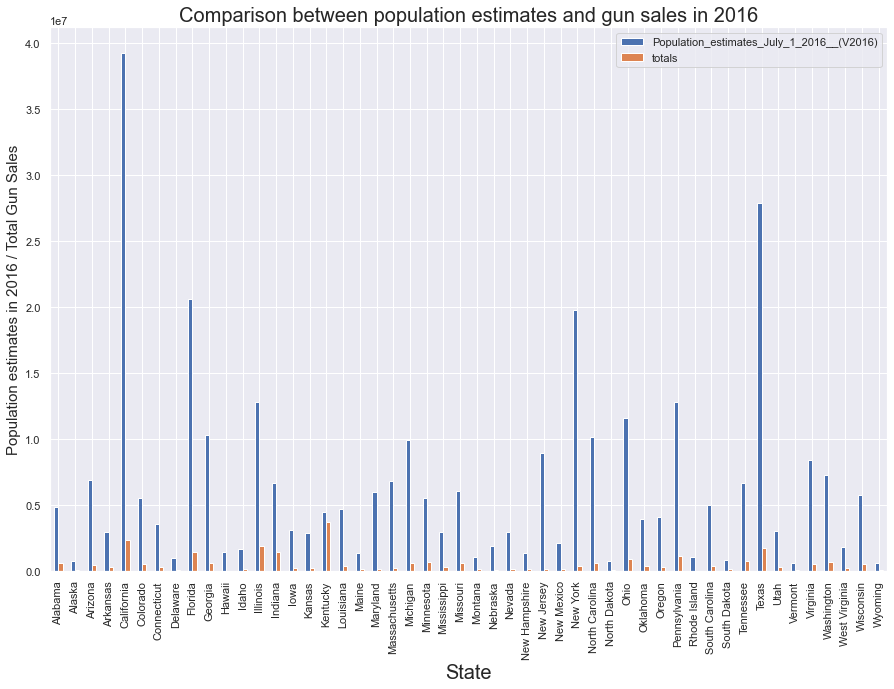

In [70]:
sns.set()
df_gun_census_16.plot(x='state', y=['Population_estimates_July_1_2016__(V2016)', 'totals'], kind='bar', figsize=(15, 10))
plt.xlabel("State", fontsize=20)
plt.ylabel("Population estimates in 2016 / Total Gun Sales", fontsize=15)
plt.title("Comparison between population estimates and gun sales in 2016", fontsize=20)

### Which states have had the highest growth in gun registrations?

In [56]:
total_guns_per_state = df_gun_clean.groupby('state')['totals'].sum()
sorted_total_guns_per_state = total_guns_per_state.sort_values(ascending = False)
sorted_total_guns_per_state[0:10]

state
Kentucky          29762434
Texas             19435186
California        19014063
Illinois          15471534
Pennsylvania      13133876
Florida           11695777
Ohio               8462744
North Carolina     7777689
Indiana            7737172
Tennessee          7311293
Name: totals, dtype: int64

Text(0, 0.5, 'Total')

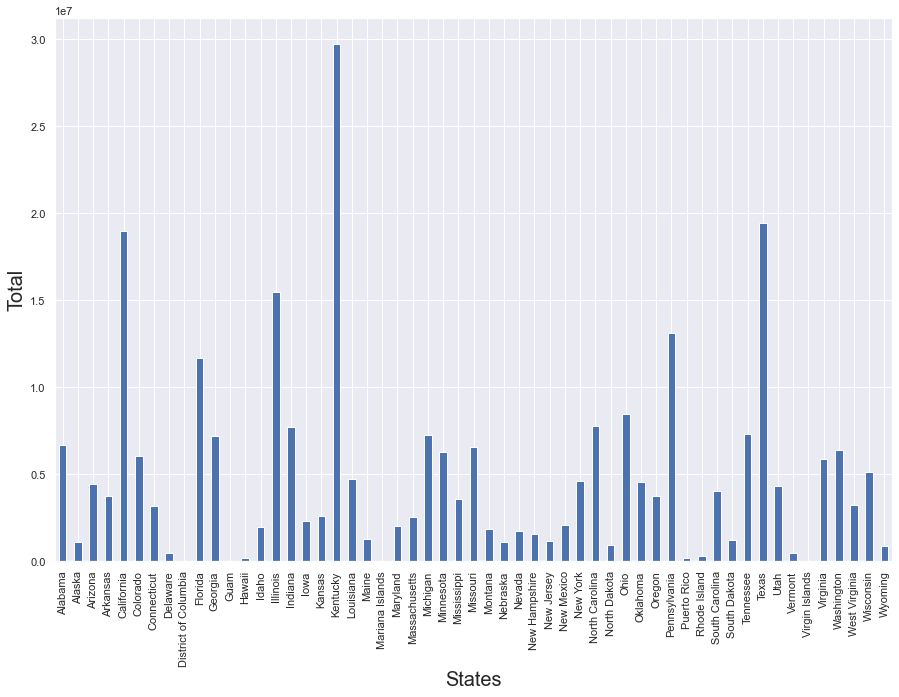

In [57]:
sns.set()
total_guns_per_state.plot(x='state', kind = 'bar', figsize=(15, 10))
plt.xlabel('States', fontsize = 20)
plt.ylabel('Total', fontsize = 20)

Text(0, 0.5, 'Total')

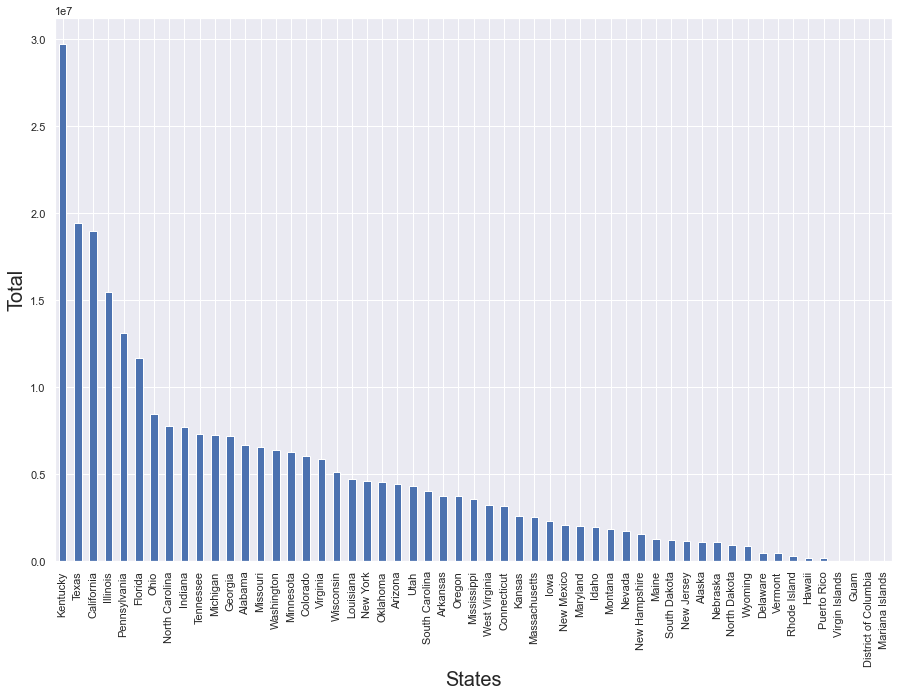

In [58]:
# Sorted histogram for total guns sales in each states 
sns.set()
sorted_total_guns_per_state.plot(x='state', kind = 'bar', figsize=(15, 10))
plt.xlabel('States', fontsize = 20)
plt.ylabel('Total', fontsize = 20)

Text(0, 0.5, 'Total')

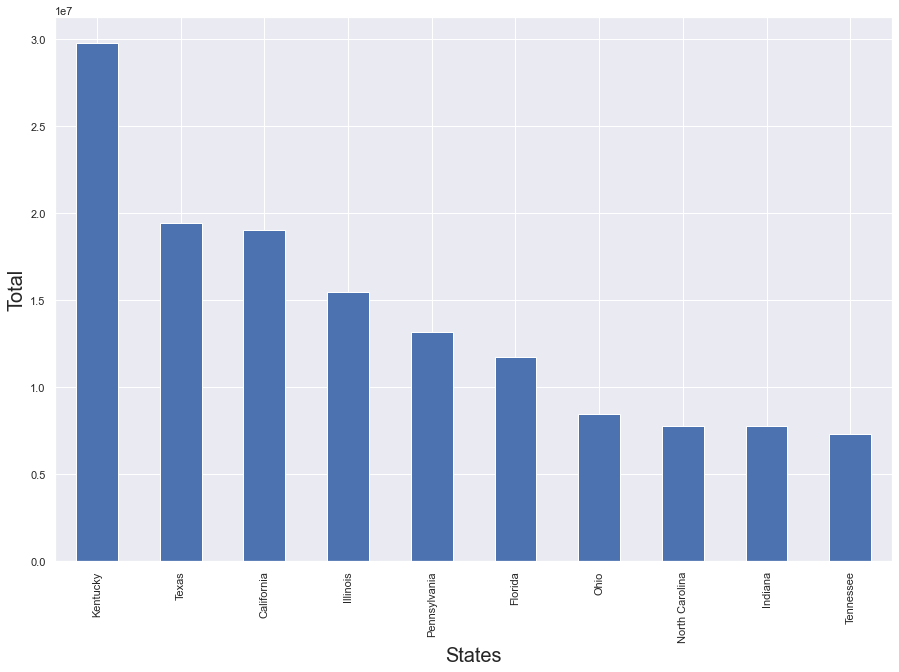

In [59]:
# Sorted histogram for only top 10 total guns sales in each states 
sns.set()
sorted_total_guns_per_state[0:10].plot(x='state', kind = 'bar', figsize=(15, 10))
plt.xlabel('States', fontsize = 20)
plt.ylabel('Total', fontsize = 20)

### What is the overall trend of gun purchases?

In [60]:
total_guns_per_year = df_gun_clean.groupby('year')['totals'].sum()
total_guns_per_year

year
1998      891898
1999     9043747
2000     8427096
2001     8820045
2002     8367069
2003     8402244
2004     8579891
2005     8867055
2006     9993057
2007    11162272
2008    12692985
2009    13984953
2010    14320489
2011    16336732
2012    19463832
2013    20966704
2014    20860241
2015    23026288
2016    27425512
2017    17990528
Name: totals, dtype: int64

<AxesSubplot:xlabel='totals', ylabel='Count'>

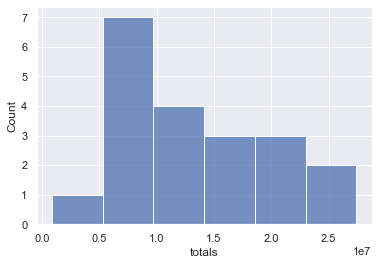

In [61]:
sns.histplot(total_guns_per_year)

(array([ 9935645., 17247141., 16769313., 17446946., 21155329., 26677938.,
        30657221., 40430536., 43886529., 45416040.]),
 array([1998. , 1999.9, 2001.8, 2003.7, 2005.6, 2007.5, 2009.4, 2011.3,
        2013.2, 2015.1, 2017. ]),
 <BarContainer object of 10 artists>)

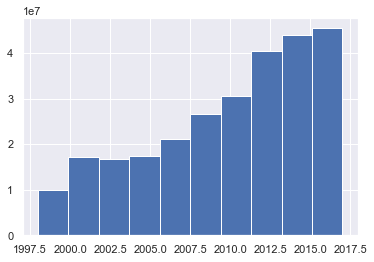

In [62]:
plt.hist(np.arange(1998, 2018), weights=total_guns_per_year.values)

Text(0, 0.5, 'Total')

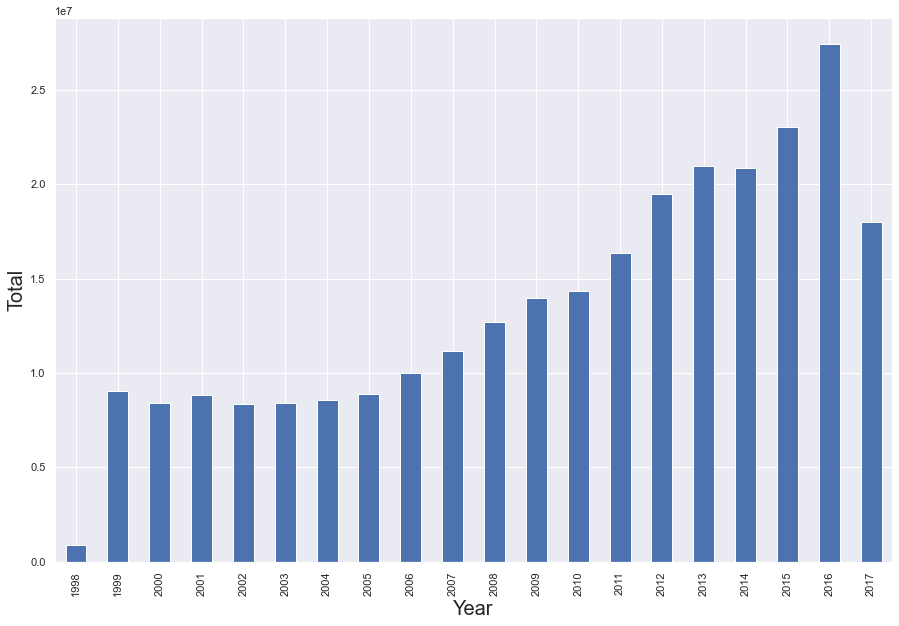

In [63]:
sns.set()
total_guns_per_year.plot(x='year', kind = 'bar', figsize=(15, 10))
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total', fontsize = 20)

<AxesSubplot:xlabel='month'>

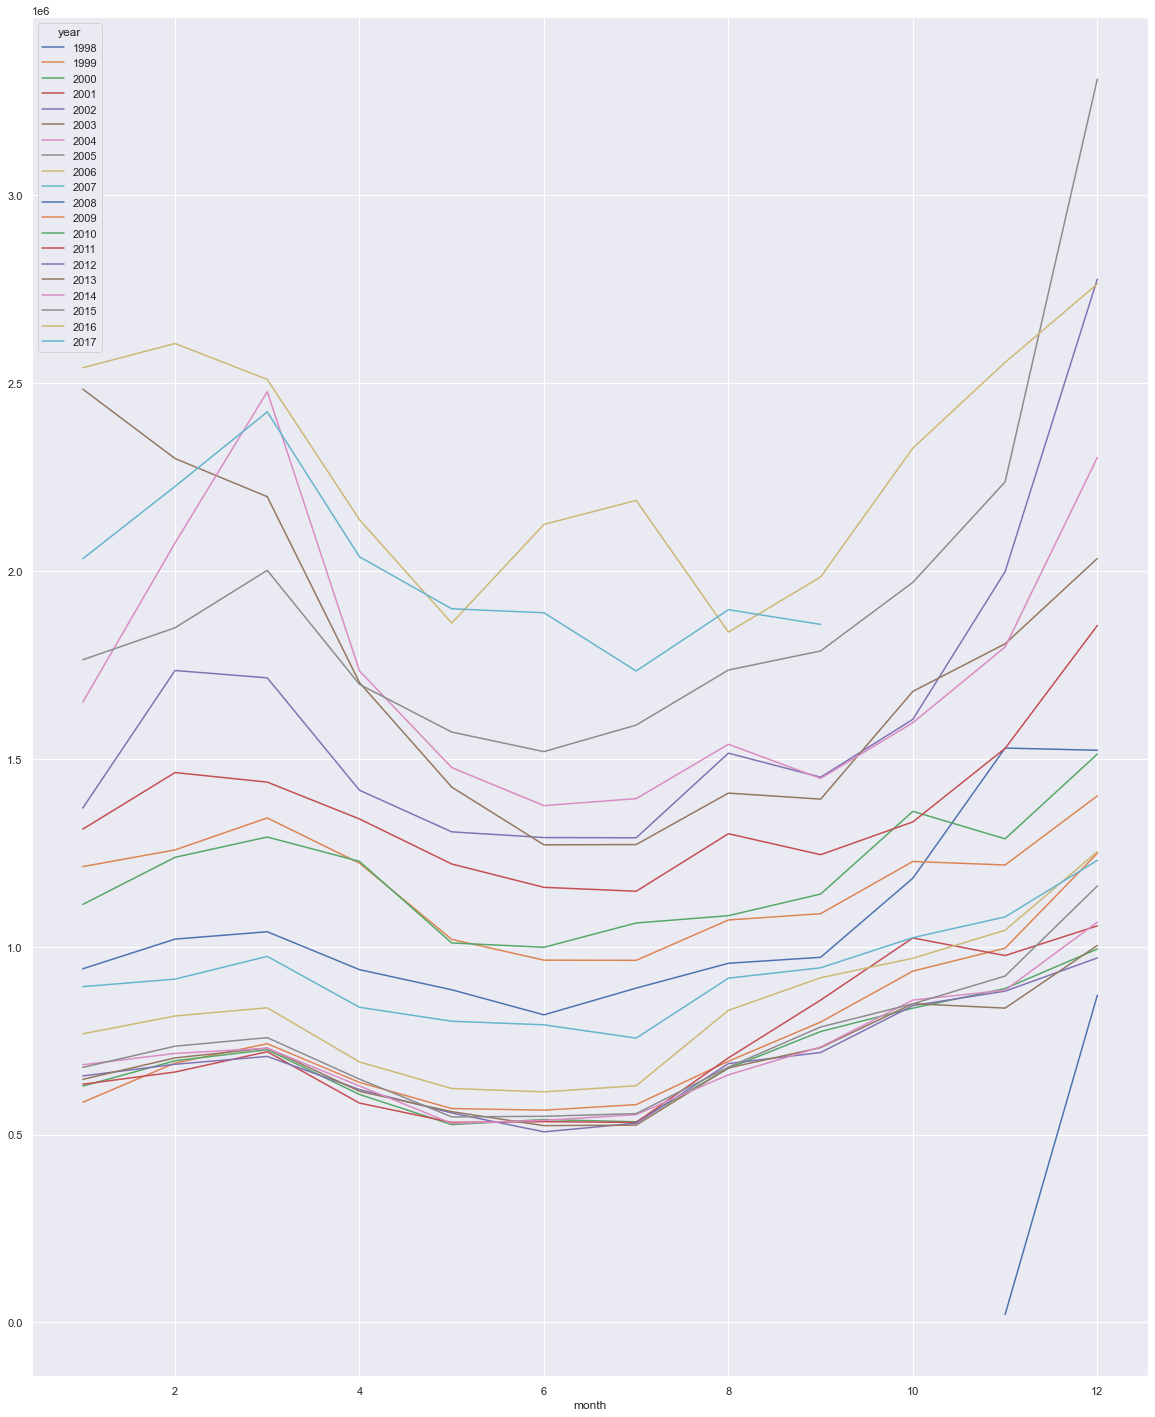

In [74]:
# plot of gun total sales per month each year
total_guns_month_year = df_gun_clean.groupby(['month', 'year'])['totals'].sum()

total_guns_month_year.unstack().plot(figsize = (20, 25))

In [65]:
guns = df_gun_clean.loc[:,['handgun', 'long_gun', 'other', 'multiple']].sum()
guns = dict(guns)

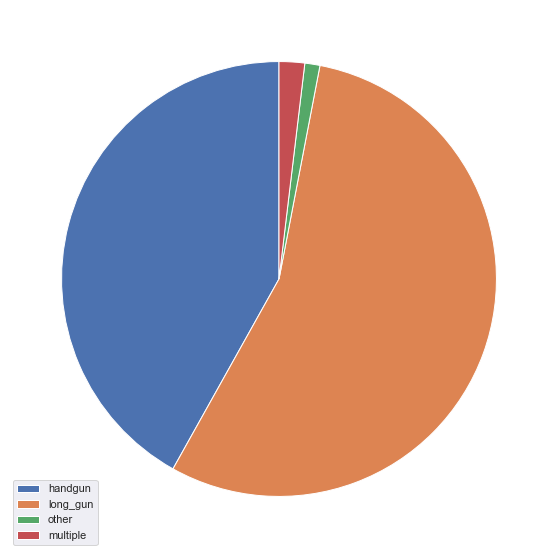

In [66]:
labels = list(guns.keys())
counts = list(guns.values())

plt.figure(figsize=(10, 10))
patches, texts = plt.pie(counts, startangle=90)
plt.legend(patches, labels, loc="best")

<a id='conclusions'></a>
## Conclusions

- There is an increase in guns sales every year.

- Kentucky is the highest in total guns sales following it Texas then California, the top 10 states are:

    1) Kentucky
    
    2) Texas
    
    3) California
    
    4) Illinos
    
    5) Pennsylvania
    
    6) Florida
    
    7) Ohio
    
    8) North Calorina
    
    9) Indiana
    
    10) Tennesse
    
- The most purchased guns are long guns.

- Population estimate and total gun sales are close in Kentucky.